# Build a Transfer Learning image classification model using the VGG16 (pre-trained network)

In [33]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#re-size all the images to this
IMAGE_SIZE=[224,224]

In [3]:
#Train data(images) path
train_path='cnn/train/'
 
#Test data(images) path
valid_path='cnn/test/'

In [12]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 
#dont train existing weights
for layer in vgg16.layers:
    layer.trainable=False

58889256/58889256 [==============================] - 17s 0us/step


In [13]:
#Getting number of classes
folders=glob('cnn/train/*')

In [14]:
folders

['cnn/train\\cat', 'cnn/train\\dog']

In [15]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg16.output)
 
#Defined the output layer
prediction=Dense(len(folders),activation='sigmoid')(x)

In [16]:
model=Model(inputs=vgg16.input,outputs=prediction)
 
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [17]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
batch_size = 32
training_set = train_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn/train/',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)

test_set = test_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)


Found 840 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [24]:
r=model.fit(training_set,
             validation_data=test_set,
             epochs=10,
             steps_per_epoch=len(training_set),
             validation_steps=len(test_set))


Epoch 1/10
27/27 [==============================] - 337s 13s/step - loss: 0.6060 - accuracy: 0.7214 - val_loss: 0.3228 - val_accuracy: 0.8565
Epoch 2/10
27/27 [==============================] - 346s 13s/step - loss: 0.2778 - accuracy: 0.8774 - val_loss: 0.3191 - val_accuracy: 0.8704
Epoch 3/10
27/27 [==============================] - 343s 13s/step - loss: 0.2067 - accuracy: 0.9202 - val_loss: 0.3408 - val_accuracy: 0.8519
Epoch 4/10
27/27 [==============================] - 348s 13s/step - loss: 0.1706 - accuracy: 0.9369 - val_loss: 0.3016 - val_accuracy: 0.8889
Epoch 5/10
27/27 [==============================] - 317s 12s/step - loss: 0.1478 - accuracy: 0.9429 - val_loss: 0.2917 - val_accuracy: 0.8889
Epoch 6/10
27/27 [==============================] - 308s 11s/step - loss: 0.1074 - accuracy: 0.9714 - val_loss: 0.2661 - val_accuracy: 0.8935
Epoch 7/10
27/27 [==============================] - 353s 13s/step - loss: 0.0824 - accuracy: 0.9833 - val_loss: 0.2734 - val_accuracy: 0.9028
Epoch 

# 

# 

# Build a Transfer Learning image classification model using the VGG19 (pre-trained network)

In [35]:
from keras.applications.vgg19 import VGG19

In [36]:
#re-size all the images to this
IMAGE_SIZE=[224,224]

In [37]:
#Train data(images) path
train_path='cnn/train/'
 
#Test data(images) path
valid_path='cnn/test/'

In [38]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 
#dont train existing weights
for layer in vgg19.layers:
    layer.trainable=False

In [41]:
#Getting number of classes
folders=glob('cnn/train/*')

#Our layers - you can add more layer if you want
x=Flatten()(vgg19.output)
 
#Defined the output layer
prediction=Dense(len(folders),activation='sigmoid')(x)

In [42]:
model=Model(inputs=vgg19.input,outputs=prediction)
 
print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [43]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
batch_size = 32
training_set = train_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn/train/',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)

test_set = test_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)


Found 840 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [46]:
r=model.fit(training_set,
             validation_data=test_set,
             epochs=5,
             steps_per_epoch=len(training_set),
             validation_steps=len(test_set))


Epoch 1/5
27/27 [==============================] - 382s 14s/step - loss: 0.1347 - accuracy: 0.9560 - val_loss: 0.2697 - val_accuracy: 0.8796
Epoch 2/5
27/27 [==============================] - 388s 14s/step - loss: 0.1503 - accuracy: 0.9405 - val_loss: 0.3954 - val_accuracy: 0.8426
Epoch 3/5
27/27 [==============================] - 383s 14s/step - loss: 0.1527 - accuracy: 0.9345 - val_loss: 0.3478 - val_accuracy: 0.8519
Epoch 4/5
27/27 [==============================] - 381s 14s/step - loss: 0.1207 - accuracy: 0.9500 - val_loss: 0.2779 - val_accuracy: 0.8843
Epoch 5/5
27/27 [==============================] - 386s 14s/step - loss: 0.1114 - accuracy: 0.9595 - val_loss: 0.3110 - val_accuracy: 0.9028


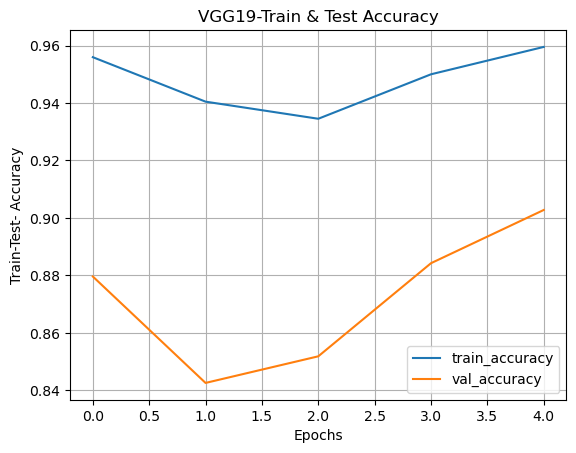

In [48]:
#Accuracy
plt.title('VGG19-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()


# 

# Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3

In [51]:
#Train data(images) path
train_path='cnn-multiclass/train/'
 
#Test data(images) path
valid_path='cnn-multiclass/test/'

In [52]:
inceptionV3=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 
#dont train existing weights
for layer in inceptionV3.layers:
    layer.trainable=False

87910968/87910968 [==============================] - 41s 0us/step


In [59]:
#Getting number of classes
folders=glob('cnn-multiclass/train/*')
len(folders)

5

In [60]:


#Our layers - you can add more layer if you want
x=Flatten()(inceptionV3.output)
 
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

In [61]:
model=Model(inputs=inceptionV3.input,outputs=prediction)
 
print(model.summary())

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [62]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
batch_size = 32
training_set = train_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn-multiclass/train/',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)

test_set = test_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn-multiclass/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)


Found 2464 images belonging to 5 classes.
Found 620 images belonging to 5 classes.


In [64]:
r=model.fit(training_set,
             validation_data=test_set,
             epochs=5,
             steps_per_epoch=len(training_set),
             validation_steps=len(test_set))

Epoch 1/5
77/77 [==============================] - 239s 3s/step - loss: 2.4845 - accuracy: 0.7735 - val_loss: 1.6942 - val_accuracy: 0.8145
Epoch 2/5
77/77 [==============================] - 227s 3s/step - loss: 0.8744 - accuracy: 0.8937 - val_loss: 0.9370 - val_accuracy: 0.9226
Epoch 3/5
77/77 [==============================] - 216s 3s/step - loss: 0.5368 - accuracy: 0.9355 - val_loss: 0.8192 - val_accuracy: 0.9177
Epoch 4/5
77/77 [==============================] - 214s 3s/step - loss: 0.5715 - accuracy: 0.9306 - val_loss: 0.8183 - val_accuracy: 0.9242
Epoch 5/5
77/77 [==============================] - 214s 3s/step - loss: 0.2928 - accuracy: 0.9574 - val_loss: 1.8034 - val_accuracy: 0.8452


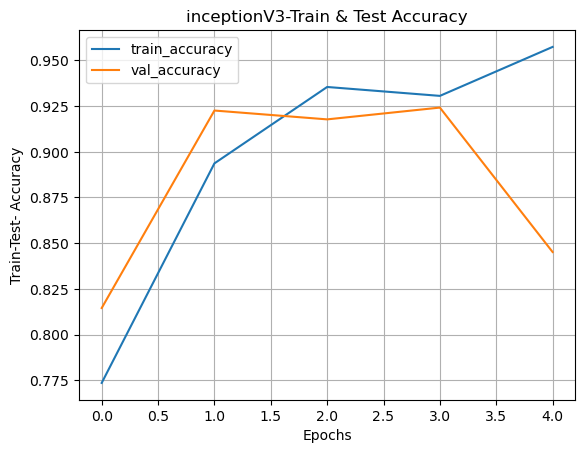

In [65]:
#Accuracy
plt.title('inceptionV3-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()


# 

# 

# Build a Multiclass image classification model with Mobilenet pretrained network

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet

In [67]:
mobilenet=MobileNet(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 
#dont train existing weights
for layer in mobilenet.layers:
    layer.trainable=False

17225924/17225924 [==============================] - 7s 0us/step


In [68]:
#Our layers - you can add more layer if you want
x=Flatten()(mobilenet.output)
 
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

In [69]:
model=Model(inputs=mobilenet.input,outputs=prediction)
 
print(model.summary())

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [70]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
batch_size = 32
training_set = train_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn-multiclass/train/',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)

test_set = test_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn-multiclass/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)


Found 2464 images belonging to 5 classes.
Found 620 images belonging to 5 classes.


In [ ]:
result=model.fit(training_set,
             validation_data=test_set,
             epochs=5,
             steps_per_epoch=len(training_set),
             validation_steps=len(test_set))

Epoch 1/5
77/77 [==============================] - 138s 2s/step - loss: 1.9777 - accuracy: 0.7898 - val_loss: 1.2175 - val_accuracy: 0.8823
Epoch 2/5
77/77 [==============================] - 126s 2s/step - loss: 0.4829 - accuracy: 0.9318 - val_loss: 1.2831 - val_accuracy: 0.8823
Epoch 3/5
77/77 [==============================] - 120s 2s/step - loss: 0.3365 - accuracy: 0.9513 - val_loss: 1.4947 - val_accuracy: 0.8855
Epoch 4/5
77/77 [==============================] - 125s 2s/step - loss: 0.3166 - accuracy: 0.9582 - val_loss: 1.2146 - val_accuracy: 0.8984
Epoch 5/5
72/77 [===========================>..] - ETA: 7s - loss: 0.1964 - accuracy: 0.9679

In [ ]:
#Accuracy
plt.title('Mobilenet-Train & Test Accuracy')
plt.plot(result.history['accuracy'],label='train_accuracy')
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()